In [69]:
import torch
import torchvision
from torch import nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import numpy as np

In [70]:
BATCH_SIZE = 256


# Transform

In [71]:
mean = torch.tensor([0.485, 0.456, 0.406])
std = torch.tensor([0.229, 0.224, 0.225])

transform = transforms.Compose([
	transforms.Normalize(mean, std),
])

In [72]:
dataset = torchvision.datasets.CIFAR10(root="./cifar10", train=False, download=True, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

print(dataset[0][0])

Files already downloaded and verified


TypeError: Input tensor should be a torch tensor. Got <class 'PIL.Image.Image'>.

In [ ]:
def plot_9_imgs(batch, labels):
	n = 3
	offset = 0  # We can start showing images at some offset untill (offset + n*n)

	fig, ax = plt.subplots(n, n)
	fig.tight_layout()

	for row in range(n):
		for col in range(n):
			cur_ax = ax[row, col]
			img_i = row*n + col + offset

			cur_ax.set_axis_off()
			cur_ax.set_title(str(img_i) + ": " + str(dataset.classes[labels[img_i]]))
			o = batch[img_i].numpy().transpose(1, 2, 0)
			cur_ax.imshow(o)

# Load pre-trained ResNet

In [ ]:
resnet18 = torchvision.models.resnet18(pretrained=True)
resnet18.eval()

images_batch, labels_batch = next(iter(dataloader))
resnet18.fc = nn.Linear(in_features=512, out_features=10)

In [ ]:
prediction = resnet18(images_batch)
softmax = nn.Softmax(dim=1)
labels_prediction = torch.max(softmax(prediction), dim=1)
print(labels_prediction.indices)

tensor([3, 8, 0, 0, 8, 5, 3, 8, 5, 0, 8, 0, 0, 5, 0, 5, 5, 0, 8, 0, 8, 8, 8, 0,
        8, 9, 8, 8, 0, 0, 0, 5, 8, 5, 8, 5, 2, 3, 0, 5, 8, 0, 0, 2, 0, 8, 6, 1,
        8, 0, 8, 0, 8, 5, 8, 8, 5, 5, 0, 5, 8, 6, 8, 1, 2, 8, 8, 8, 8, 8, 8, 5,
        8, 8, 8, 8, 8, 0, 0, 8, 8, 3, 8, 8, 0, 0, 8, 8, 8, 0, 8, 5, 0, 8, 8, 5,
        5, 5, 8, 2, 8, 0, 5, 5, 8, 8, 1, 0, 0, 6, 0, 8, 8, 5, 0, 6, 8, 0, 1, 3,
        8, 8, 0, 5, 8, 5, 0, 5, 8, 2, 8, 0, 0, 8, 0, 1, 0, 0, 8, 0, 8, 8, 5, 8,
        5, 8, 0, 5, 1, 0, 3, 8, 0, 8, 8, 1, 8, 1, 8, 8, 2, 5, 5, 8, 8, 0, 8, 0,
        3, 8, 0, 5, 1, 1, 0, 5, 0, 8, 5, 0, 8, 5, 5, 2, 8, 8, 8, 5, 8, 0, 5, 0,
        1, 0, 0, 8, 5, 8, 0, 0, 5, 8, 0, 0, 0, 5, 0, 8, 8, 8, 2, 0, 5, 8, 0, 8,
        8, 8, 3, 8, 8, 0, 6, 8, 5, 0, 8, 8, 8, 0, 5, 3, 0, 0, 8, 8, 0, 8, 2, 5,
        8, 7, 5, 7, 8, 8, 8, 8, 8, 3, 5, 5, 0, 0, 8, 8])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

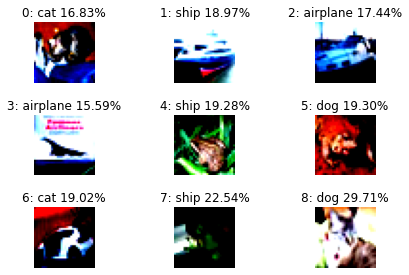

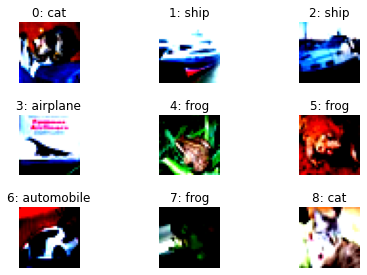

In [ ]:
n = 3
fig, ax = plt.subplots(n, n)
fig.tight_layout()

for row in range(n):
	for col in range(n):
		cur_ax = ax[row, col]
		img_i = row*n + col

		label = dataset.classes[labels_prediction.indices[img_i]]

		prob = labels_prediction.values[img_i].item() * 100 # Get probability of the image being of the class
		prob = '%.2f' % prob # Show only 2 decimal places

		title = f"{img_i}: {label} {prob}%"

		cur_ax.set_axis_off()
		cur_ax.set_title(str(title))
		o = images_batch[img_i].numpy().transpose(1, 2, 0)
		cur_ax.imshow(o)

plot_9_imgs(images_batch, labels_batch)